### Welcome, we will discuss about data leakage here.

#### This notebook is divided into two parts :
1. Model with data leakage
2. Model without data leakage



In [1]:
# Importing the libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
%matplotlib inline

Let us check where we are

In [2]:
os.listdir()

['.ipynb_checkpoints', 'car_data.csv', 'Data Leakage.ipynb']

So we have our car_data file here from cardekho.com. Now we can proceed. 
Based on various features we have to predict selling price of a car.

### Error calculator function is defined here

In [3]:
def error(model,X_train, X_test, y_train, y_test):
    y_pred = model.predict(X_test)
    # train error
    mse = mean_squared_error(y_train, model.predict(X_train))
    mae = mean_absolute_error(y_train, model.predict(X_train))
    rmse = np.sqrt(((model.predict(X_train) - y_train) ** 2).mean())
    print("Training error - \n")
    print("MSE on Train data: ", mse)
    print("MAE on Train data: ", mae)
    print("RMSE on Train data: ", rmse)
    # test error
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(((y_pred - y_test) ** 2).mean())
    print("\n\nTesting error - \n")
    print("MSE on Test data: ", mse)
    print("MAE on Test data: ", mae)
    print("RMSE on Test data: ", rmse)

### Importing our data file and preprocessing

In [4]:

df = pd.read_csv("car_data.csv")

In [5]:
# Let us look at our dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
# dropping Car_Name feature because it is useless.
df.drop(['Car_Name'],axis=1, inplace=True)

In [7]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
# converting categorical into numerical

df = pd.concat([df[['Year','Selling_Price','Present_Price','Kms_Driven','Owner']], 
               pd.get_dummies(df[['Fuel_Type','Seller_Type','Transmission']],drop_first=True)],axis=1)

In [9]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


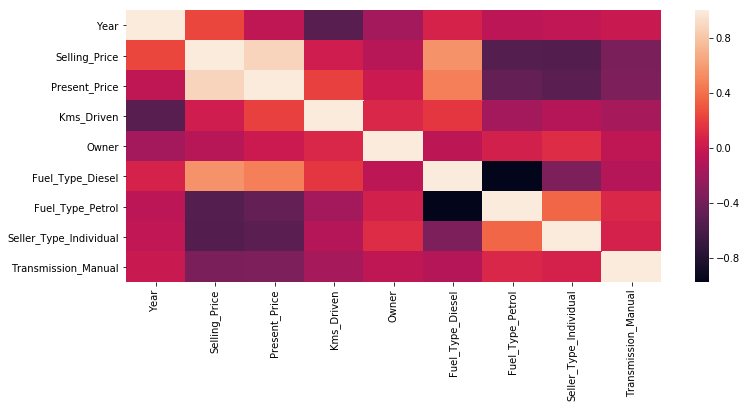

In [10]:
# Checking for correlation between feautures

correlation_matrix = df.corr()
fig,ax = plt.subplots(figsize = (12,5))
sns.heatmap(correlation_matrix,xticklabels=df.columns,yticklabels=df.columns,ax=ax);
plt.show()

The features are not significantly correlated. So we can proceed.

In [11]:
# dividing features into X and y 
y = df[['Selling_Price']]
X = df.drop(['Selling_Price'],axis=1)

In [12]:
# Take a look at y.
y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [13]:
# Take a look at X
X.head()

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,0,1,0,1
1,2013,9.54,43000,0,1,0,0,1
2,2017,9.85,6900,0,0,1,0,1
3,2011,4.15,5200,0,0,1,0,1
4,2014,6.87,42450,0,1,0,0,1


# First part

#### While doing any kind of transformation or preprocessing, we transform the whole data in one go before splitting them into X_Train and X_Test. This is a type of data leakage. So all the data becomes of same type and we can not measure model accuracy correctly. In this case our model performs well on test data but fails to work in production.

In this first part we are doing a mistake i.e., transforming before splitting. A problem.

In [69]:
# Implementing scaler
#scaler = MinMaxScaler()
scaler = RobustScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)
scaled_X[0]

array([ 0.        , -0.09310345, -0.14807356,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [70]:
# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(210, 8) (91, 8) (210, 1) (91, 1)


### Simple Linear Regression overfits (I have checked already ). Applying L2 penalty.

In [71]:
# Implementing ridge regression

params = {"alpha": [.00001, .0001, .001, .005, .01, .1, 1, 5]}
ridreg = Ridge()
clf = GridSearchCV(estimator=ridreg, param_grid=params, cv=5, return_train_score=True)
clf.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.005, 0.01, 0.1, 1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [72]:
clf.best_estimator_


Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [73]:
ridreg1 = Ridge(0.1)
ridreg1.fit(X_train,y_train)
error(ridreg1,X_train, X_test, y_train, y_test)

Training error - 

MSE on Train data:  3.275739581278886
MAE on Train data:  1.2045850398896747
RMSE on Train data:  Selling_Price    1.8099
dtype: float64


Testing error - 

MSE on Test data:  3.6400403545731317
MAE on Test data:  1.1764553379537612
RMSE on Test data:  Selling_Price    1.907889
dtype: float64


# Second part
In this part we will first split the data and then we will transform Xtrain and Xtest separately. 

In [79]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(210, 8) (91, 8) (210, 1) (91, 1)


In [80]:
# Implementing scaler
#scaler = MinMaxScaler()
scaler = RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [81]:
# Implementing ridge regression
params = {"alpha": [.00001, .0001, .001, .005, .01, .1, 1, 5]}
ridreg = Ridge()
clf = GridSearchCV(estimator=ridreg, param_grid=params, cv=5, return_train_score=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.005, 0.01, 0.1, 1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [82]:
clf.best_estimator_

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [83]:
# Chhosing alpha = 0.1
ridreg2 = Ridge(0.1)
ridreg2.fit(X_train,y_train)
error(ridreg2,X_train, X_test, y_train, y_test)

Training error - 

MSE on Train data:  2.390357934837952
MAE on Train data:  1.065357227503348
RMSE on Train data:  Selling_Price    1.546078
dtype: float64


Testing error - 

MSE on Test data:  5.048967984714479
MAE on Test data:  1.4239753703951354
RMSE on Test data:  Selling_Price    2.246991
dtype: float64


## <center>Conclusion</center>
## We will take last two models and compare it.
## Model_1 = ridreg1
## Model_2 = ridreg2

In Model_1 we see that rmse_train and rmse_test has a little difference, we can say it as ok (but not in production). Inspite of being wrong method we will accept this model. This is what data leakage is. But seeing Model_2 , we see that there is a huge difference between rmse_train and rmse_test. The method in Model_2 is right. And we should tune the model_2 to make it right for production. 

### Note : While running yourself the error can vary from this notebook.
Here the only purpose was two to introduce data leakage.